In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from photoholmes.utils.image import read_image

def plot_image(image, title="Image"):
    if isinstance(image, bytes):
        image = np.frombuffer(image, np.uint8)
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)

    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap="gray" if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis("off")
    plt.show()

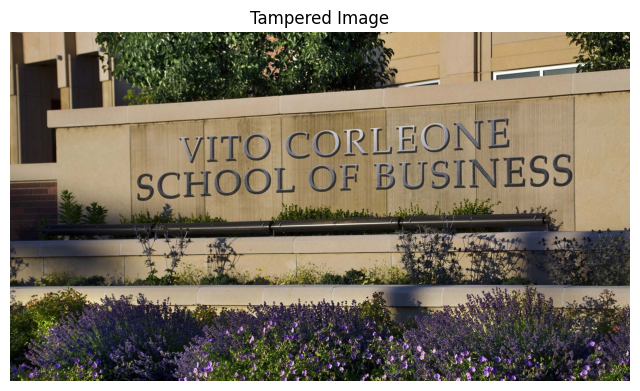

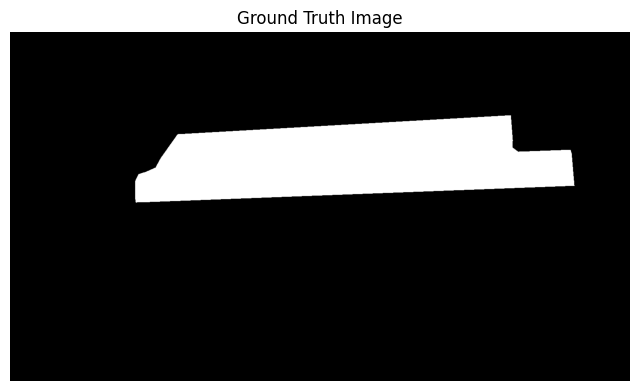

In [3]:
img_folder = "/home/nhat82125/ForgeryX-Server/example"
img_name = "5696"

tp_img = read_image(os.path.join(img_folder, f"{img_name}.jpg"))
gt_img = read_image(os.path.join(img_folder, f"{img_name}.png"))

plot_image(tp_img.permute(1, 2, 0).numpy(), "Tampered Image")
plot_image(gt_img.permute(1, 2, 0).numpy(), "Ground Truth Image")

In [4]:
from photoholmes.methods.noisesniffer import Noisesniffer, noisesniffer_preprocessing

image_data = {"image": tp_img}

input_image = noisesniffer_preprocessing(**image_data)
method = Noisesniffer()

output = method.predict(**input_image)

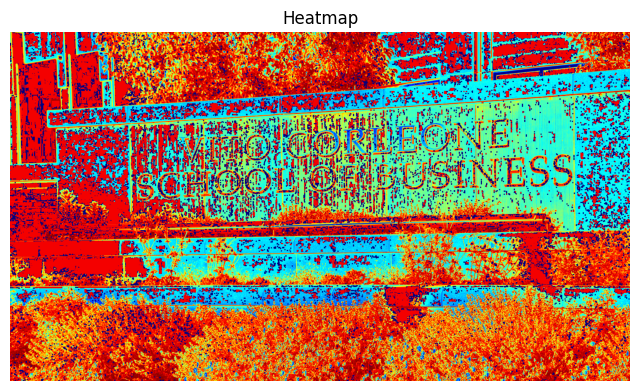

In [6]:
binary_image = np.array(output[1], dtype=np.float32)
normalized_image = cv2.normalize(
    binary_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
heatmap = cv2.applyColorMap(
    normalized_image, cv2.COLORMAP_JET)

plot_image(heatmap, "Heatmap")